In [73]:
import pandas as pd

# data = pd.read_csv('your_file.csv', delimiter='\t')
data = pd.read_csv('CIFAR10runs.csv', delimiter='\t')
print(data.head())
print(data.columns)


       model  wid_multi  trainsize  test_acc  train_acc  train_loss  ctParams  \
0      LeNet          1        250     24.49       32.4    1.830399     62006   
1   ResNet18          1        250     23.38       35.2    1.726181  11173962   
2      VGG19          1        250     10.67       13.6    2.322728  20040522   
3  GoogLeNet          1        250     31.53       80.4    0.762556   6166250   

   GPUs  epochs  train_time  test_time         time     data run_lbl   lr  \
0     1      29    0.111939   0.015063  09/30 11:30  CIFAR10  runlbl  0.1   
1     1      29    0.168933   0.039146  09/30 11:40  CIFAR10  runlbl  0.1   
2     1      29    0.123421   0.019553  09/30 11:49  CIFAR10  runlbl  0.1   
3     1      29    0.838752   0.266627  09/30 12:21  CIFAR10  runlbl  0.1   

   maxEpochs  bma_test_acc  bma_test_ll        cmll           mll  
0         30         24.49    -2.020767 -104.610608   -496.072406  
1         30         23.38    -2.112346 -101.812207 -12863.156000  
2   

In [74]:
# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()
print(data.columns)  # Check the cleaned column names


Index(['model', 'wid_multi', 'trainsize', 'test_acc', 'train_acc',
       'train_loss', 'ctParams', 'GPUs', 'epochs', 'train_time', 'test_time',
       'time', 'data', 'run_lbl', 'lr', 'maxEpochs', 'bma_test_acc',
       'bma_test_ll', 'cmll', 'mll'],
      dtype='object')


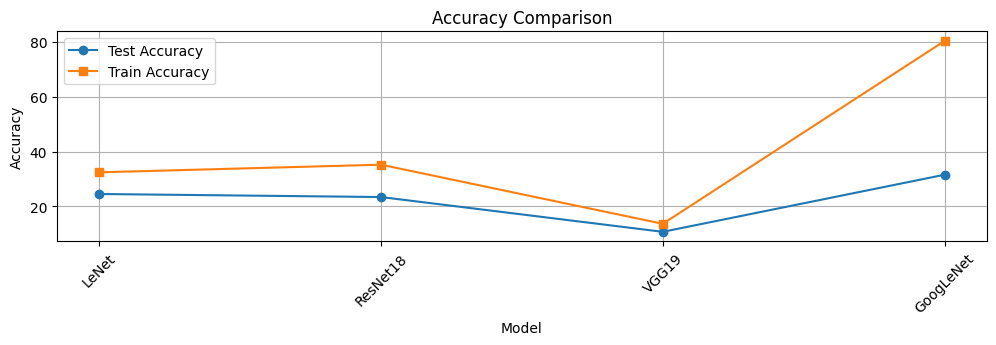

In [75]:
# Set the index to model names
data.set_index('model', inplace=True)

# Now proceed with plotting
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(2, 1, 1)
plt.plot(data.index, data['test_acc'], marker='o', label='Test Accuracy')
plt.plot(data.index, data['train_acc'], marker='s', label='Train Accuracy')
# plt.plot(data.index, data['bma_test_acc'], marker='^', label='BMA Test Accuracy')
# plt.plot(data.index, data['bma_test_ll'], marker='x', label='BMA Test')

plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid()


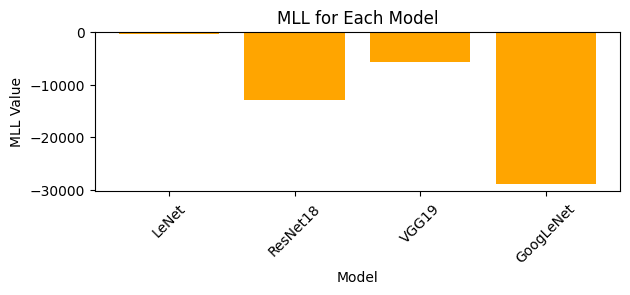

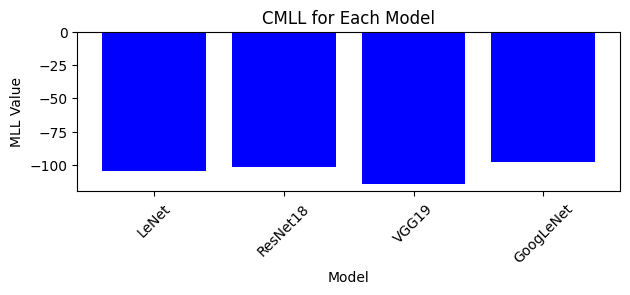

In [76]:
# Plot MLL
plt.subplot(2, 1, 2)
plt.bar(data.index, data['mll'], color='orange', label='MLL')
plt.title('MLL for Each Model')
plt.xlabel('Model')
plt.ylabel('MLL Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Plot CMLL
plt.subplot(2, 1, 2)
plt.bar(data.index, data['cmll'], color='blue', label='CLL')
plt.title('CMLL for Each Model')
plt.xlabel('Model')
plt.ylabel('MLL Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

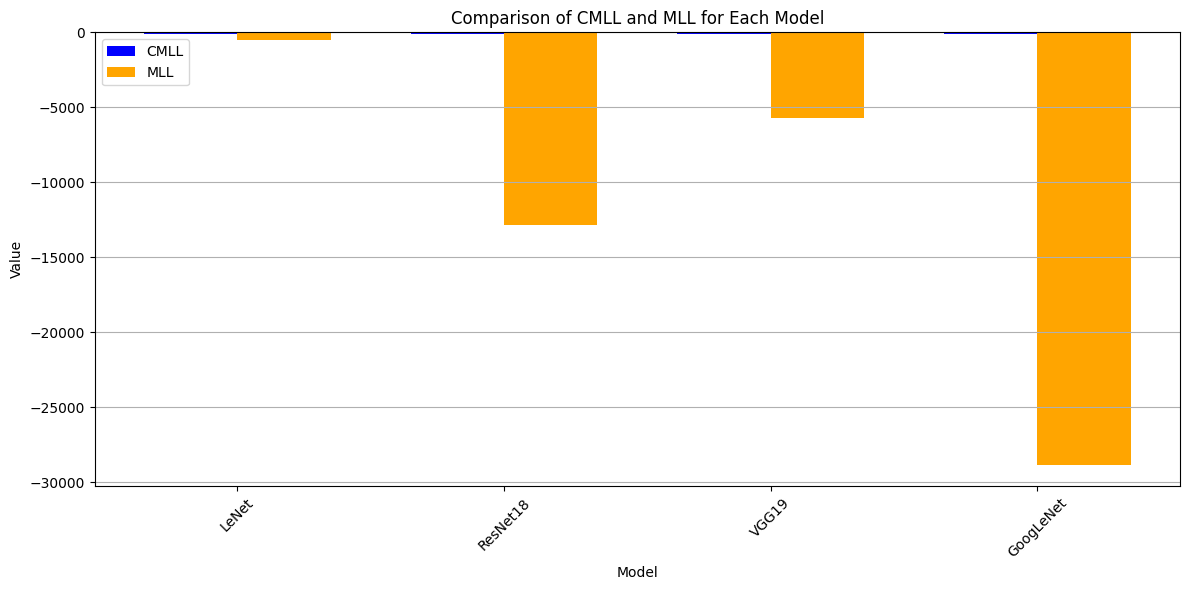

In [77]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Load the CSV file with tab as the delimiter
# data = pd.read_csv('your_file.csv', delimiter='\t')

# Clean column names by stripping whitespace
# data.columns = data.columns.str.strip()

# Set the index to model names
# data.set_index('model', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.35
x = range(len(data.index))

# Plot CMLL
plt.bar(x, data['cmll'], width=bar_width, label='CMLL', color='blue', align='center')

# Plot MLL, offsetting it by the width of the bars
plt.bar([p + bar_width for p in x], data['mll'], width=bar_width, label='MLL', color='orange', align='center')

# Add titles and labels
plt.title('Comparison of CMLL and MLL for Each Model')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks([p + bar_width / 2 for p in x], data.index, rotation=45)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()
